In [1]:
import lightkurve as lk
import pandas as pd
import pickle
import emcee
import corner
import speclite as speclite; from speclite import filters
from tqdm import tqdm
from matplotlib import cm
from matplotlib.artist import Artist
from chromatic import *
from scipy.optimize import minimize
from scipy.optimize import curve_fit

params = {'legend.fontsize': 'medium',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
plt.style.use('tableau-colorblind10')

In [8]:
def recreate_lc(visit,filt,camera):
    
    t = np.load(f'../data/LCO_Photometry/{visit}_{filt}_{camera}_times.npy')
    f = np.load(f'../data/LCO_Photometry/{visit}_{filt}_{camera}_fluxes.npy')
    e = np.load(f'../data/LCO_Photometry/{visit}_{filt}_{camera}_uncertainties.npy')
    
    newlc = lk.LightCurve(time = t*u.day, flux = f, flux_err = e)

    return newlc

In [9]:
def sinusoid_model(time, parameters,Period = 4.863):
        
    A = parameters[0]
    B = parameters[1]
    
    argument = (2.0 * np.pi * time)/Period
    
    model = A*np.sin(argument) + B*np.cos(argument) + 1
    
    return model

In [10]:
def combined_chisq(lightcurves,parameters):
    
    A = parameters[0]
    B = parameters[1]
    offsets = np.array(parameters[2:])
    
    chisq = 0
    ln_like = 0

    for i in range(len(lightcurves)):
        err_weight = np.sum(1/np.sqrt(2*np.pi*(lightcurves[i].flux_err)))
        _model = sinusoid_model(lightcurves[i].time.value, parameters) + offsets[i]
        _chisq = np.sum((lightcurves[i].flux - _model)**2/(lightcurves[i].flux_err)**2)
        chisq+=_chisq
        ln_like += (err_weight - 0.5*_chisq)

    return chisq, ln_like

In [21]:
def lnprob_formcmc(parameters, **kwargs): #this will return a total ln_like for all 4 cameras
    
    ln_like = 0
    # ln_prior = -np.inf
    
    lightcurves = clipped_lcs

    A = parameters[0]
    B = parameters[1]
    offsets = np.array(parameters[2:])
    
    for i in range(0,ncams):
        model = sinusoid_model(lightcurves[i].time.value,parameters) + offsets[i]
        err_weight = np.sum(1/np.sqrt(2*np.pi*(lightcurves[i].flux_err)))
        chisq = np.sum((lightcurves[i].flux - model)**2/(lightcurves[i].flux_err)**2)
        ln_like += (err_weight - 0.5*chisq)

    if visit == 'F21':
        if this_filter == 'ip':
            prior_phase = 1.85
            prior_phase_err = 0.03
            this_phase = np.arccos(A/np.sqrt(A**2+B**2))
            ln_prior = - (1.0/2.0)*((prior_phase-this_phase)/prior_phase_err)**2.0
            ln_like += ln_prior
    
    return ln_like

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

(Nsteps-burnin)*nwalkers/tau= [1223.84307674]
(Nsteps-burnin)*nwalkers/tau= [1454.96023537]
(Nsteps-burnin)*nwalkers/tau= [1128.81714278]
(Nsteps-burnin)*nwalkers/tau= [1197.20284998]
(Nsteps-burnin)*nwalkers/tau= [1002.79708032]
(Nsteps-burnin)*nwalkers/tau= [1401.29776308]
MCMC Results:
F21 gp
X = 0.07531 +0.00531 -0.00532
Theta = 1.835 +0.0509 -0.0509


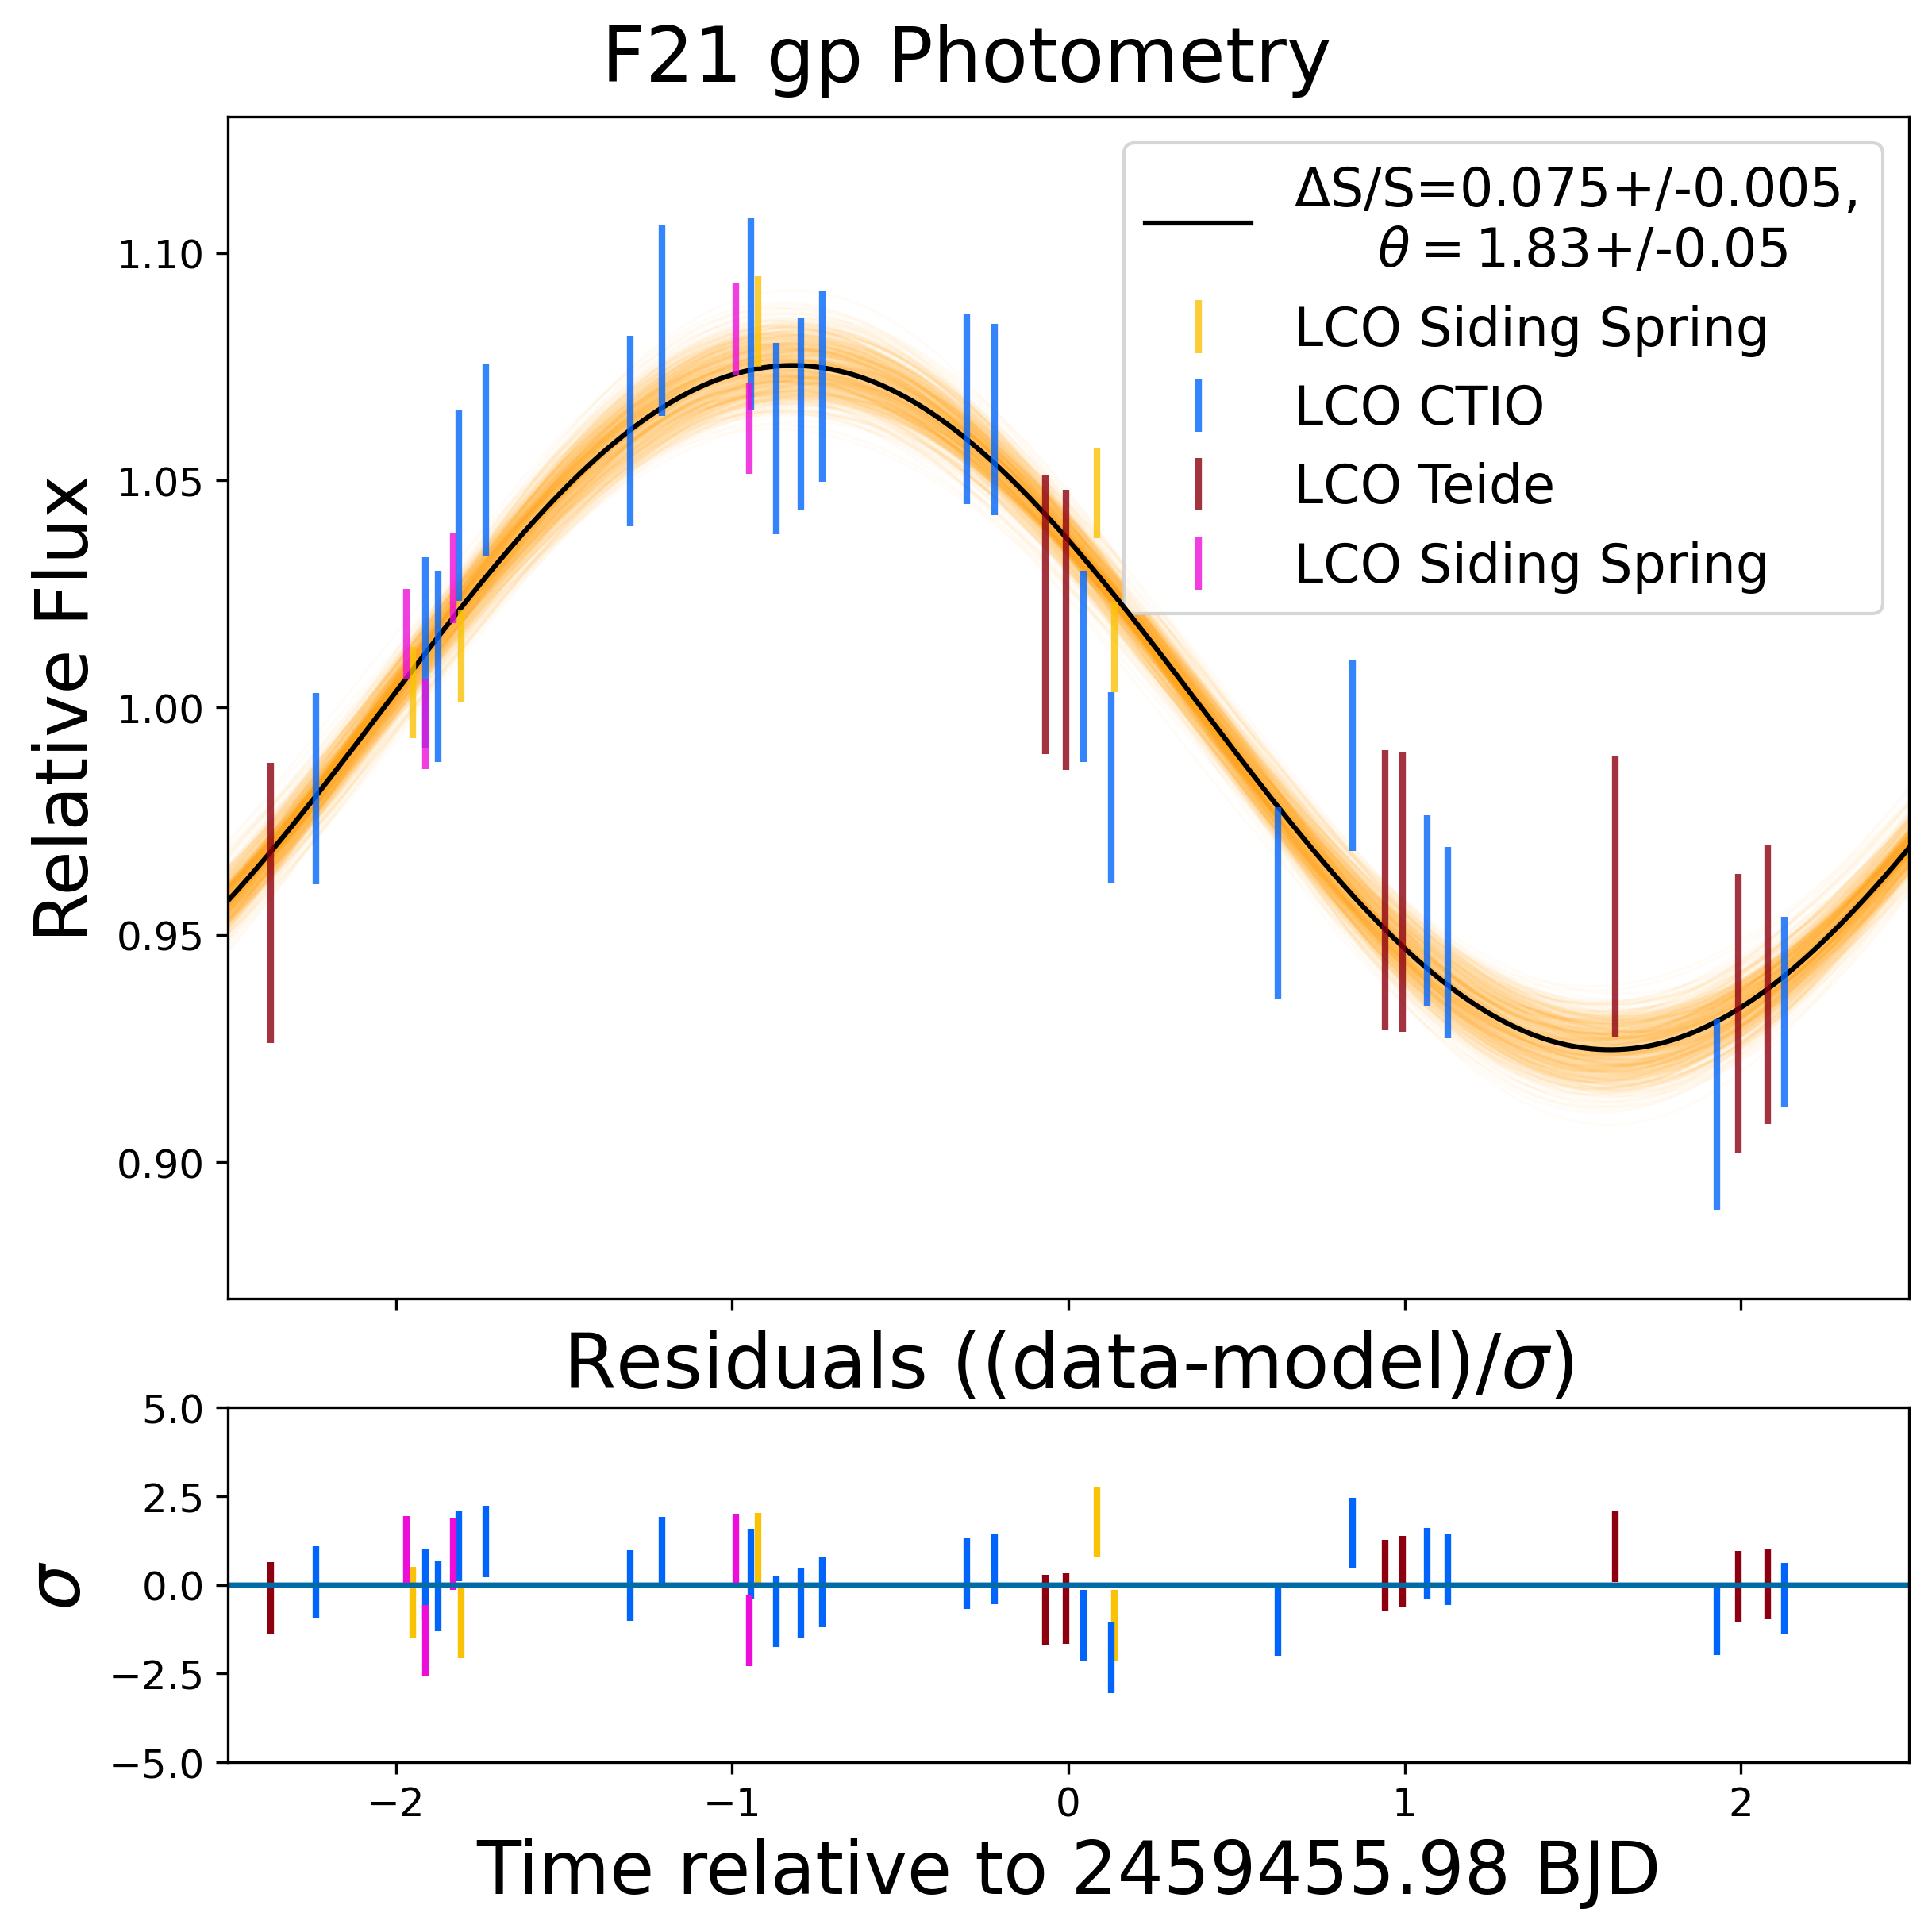

---------------------
(Nsteps-burnin)*nwalkers/tau= [1040.10642993]
(Nsteps-burnin)*nwalkers/tau= [1263.38570484]
(Nsteps-burnin)*nwalkers/tau= [939.31860645]
(Nsteps-burnin)*nwalkers/tau= [1423.43348413]
(Nsteps-burnin)*nwalkers/tau= [1346.28939528]
(Nsteps-burnin)*nwalkers/tau= [1299.7091511]
MCMC Results:
F21 rp
X = 0.07472 +0.00513 -0.00502
Theta = 1.882 +0.0535 -0.0507


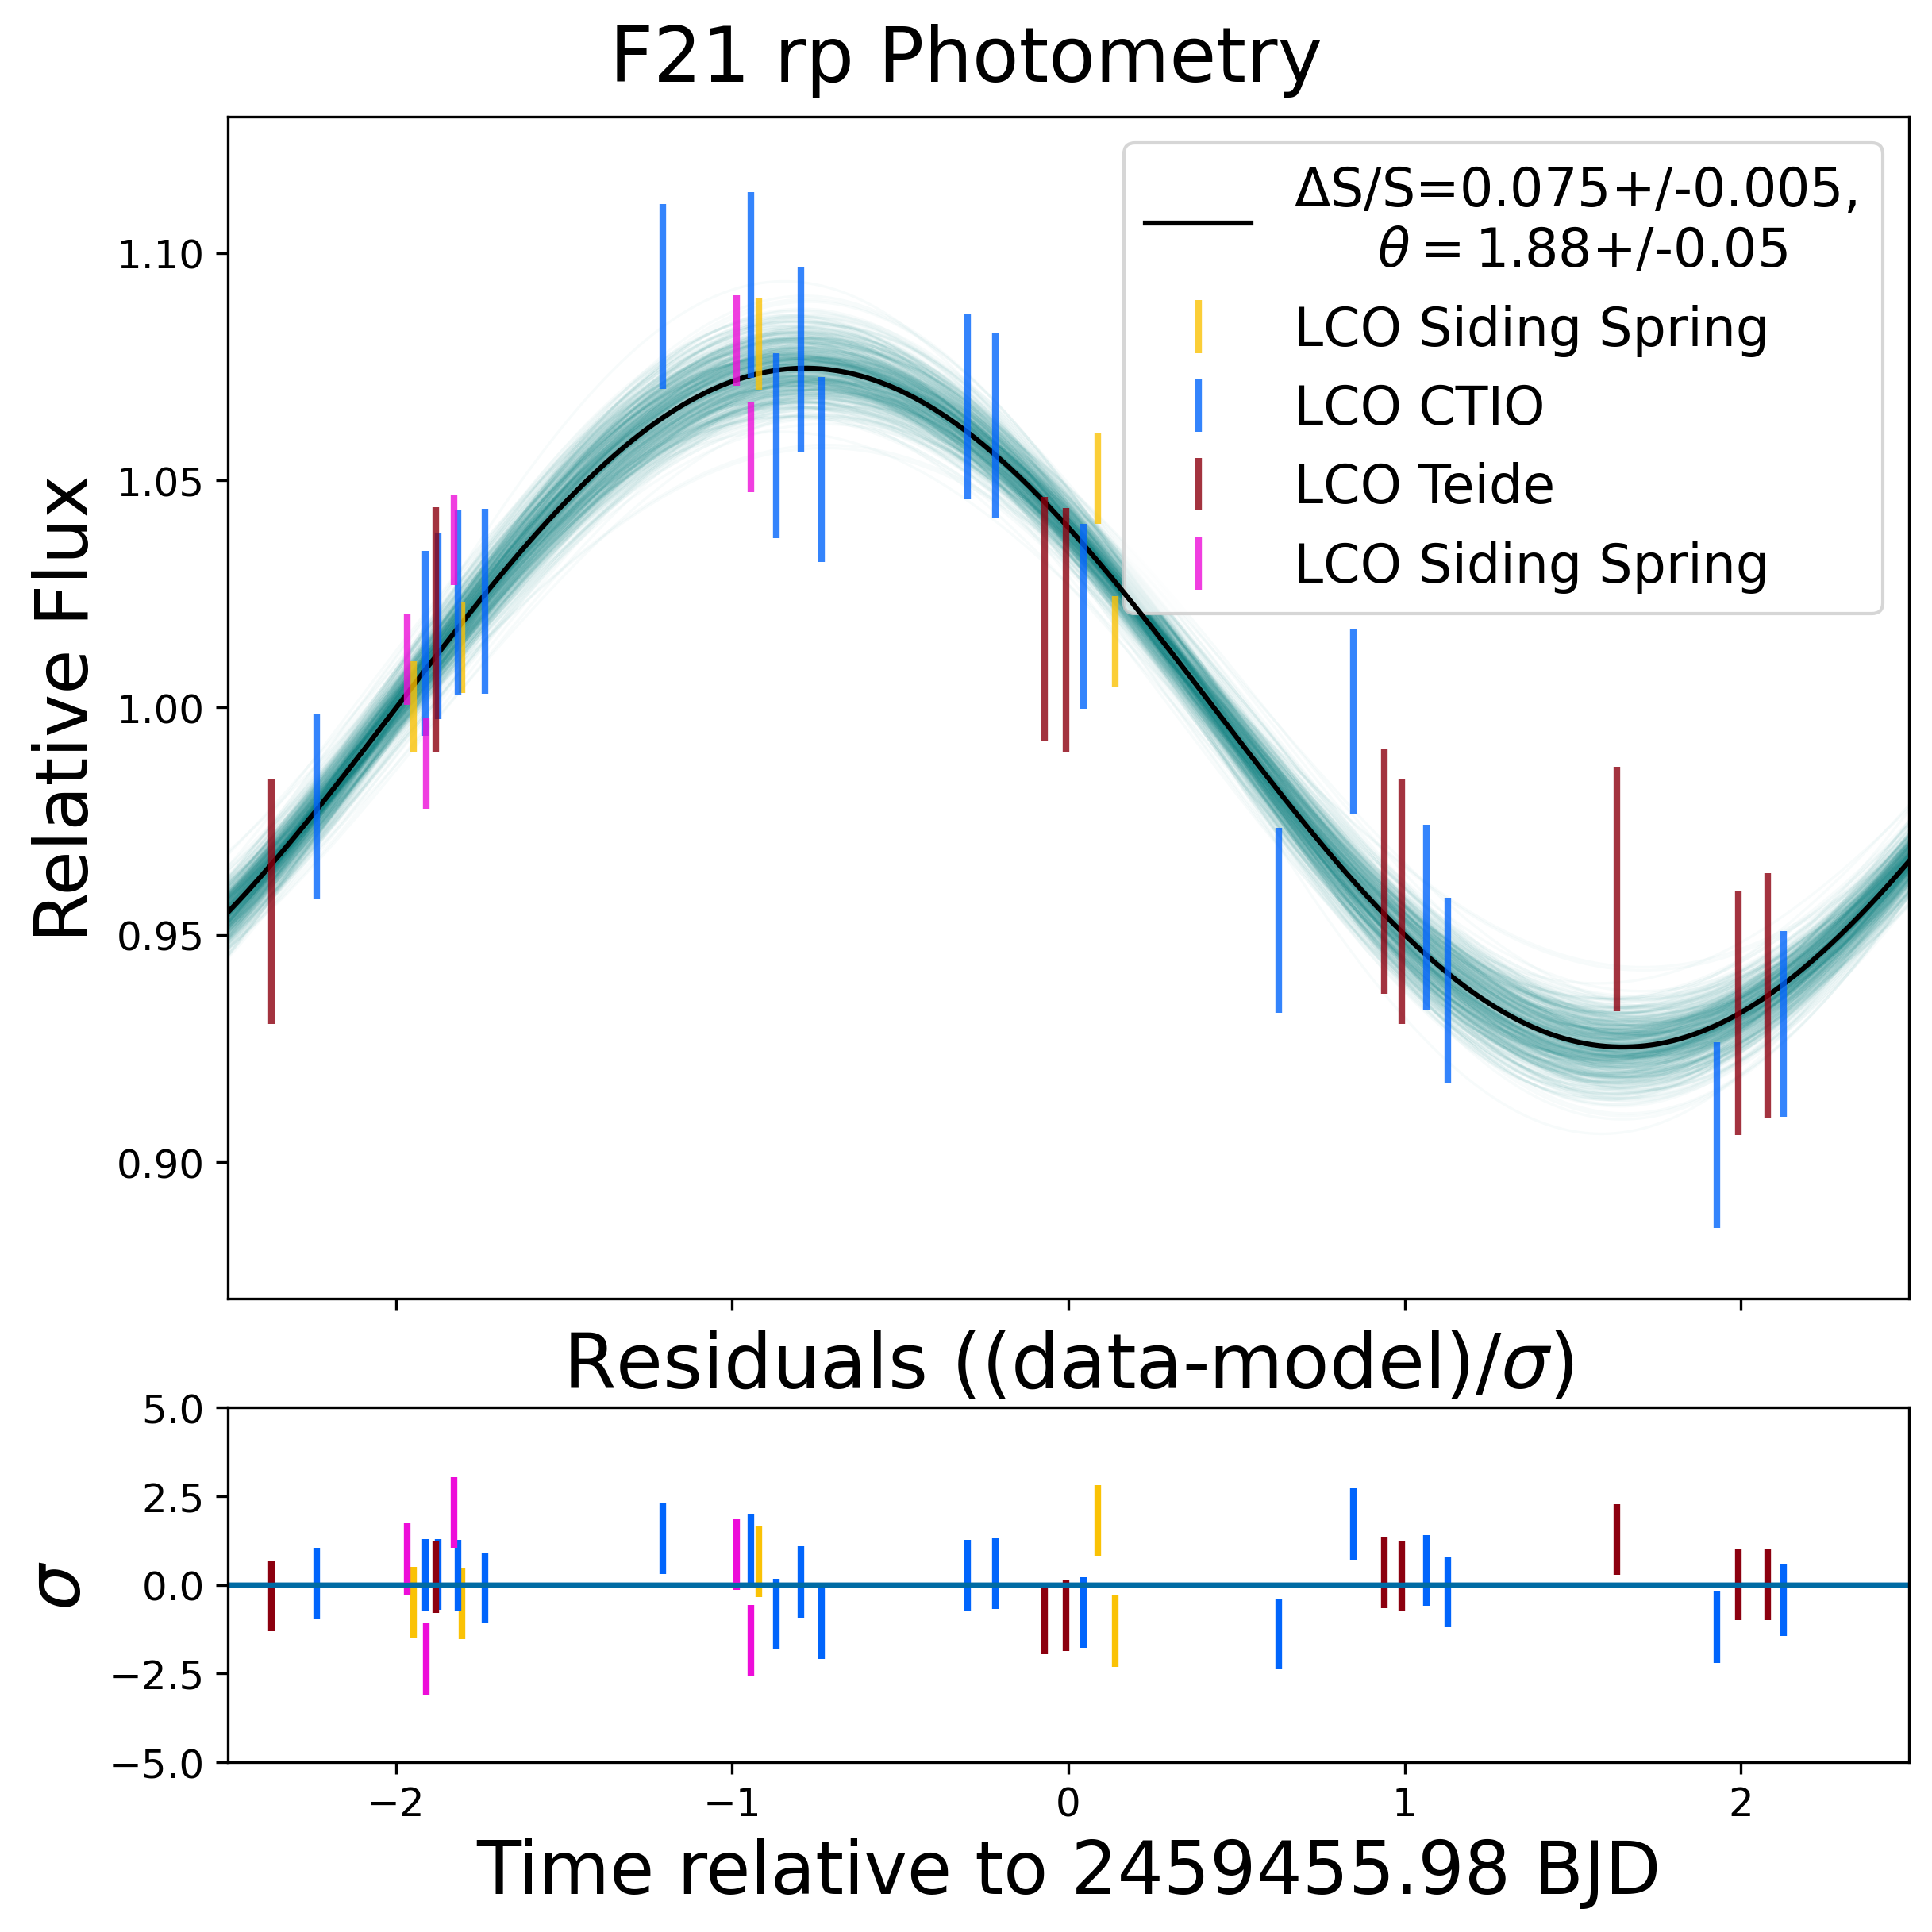

---------------------
(Nsteps-burnin)*nwalkers/tau= [1002.2570484]
(Nsteps-burnin)*nwalkers/tau= [1096.59691492]
(Nsteps-burnin)*nwalkers/tau= [1179.35826947]
(Nsteps-burnin)*nwalkers/tau= [1147.70284981]
(Nsteps-burnin)*nwalkers/tau= [1170.11366531]
(Nsteps-burnin)*nwalkers/tau= [1410.901639]
MCMC Results:
F21 ip
X = 0.0504 +0.00553 -0.00545
Theta = 1.878 +0.029 -0.0284


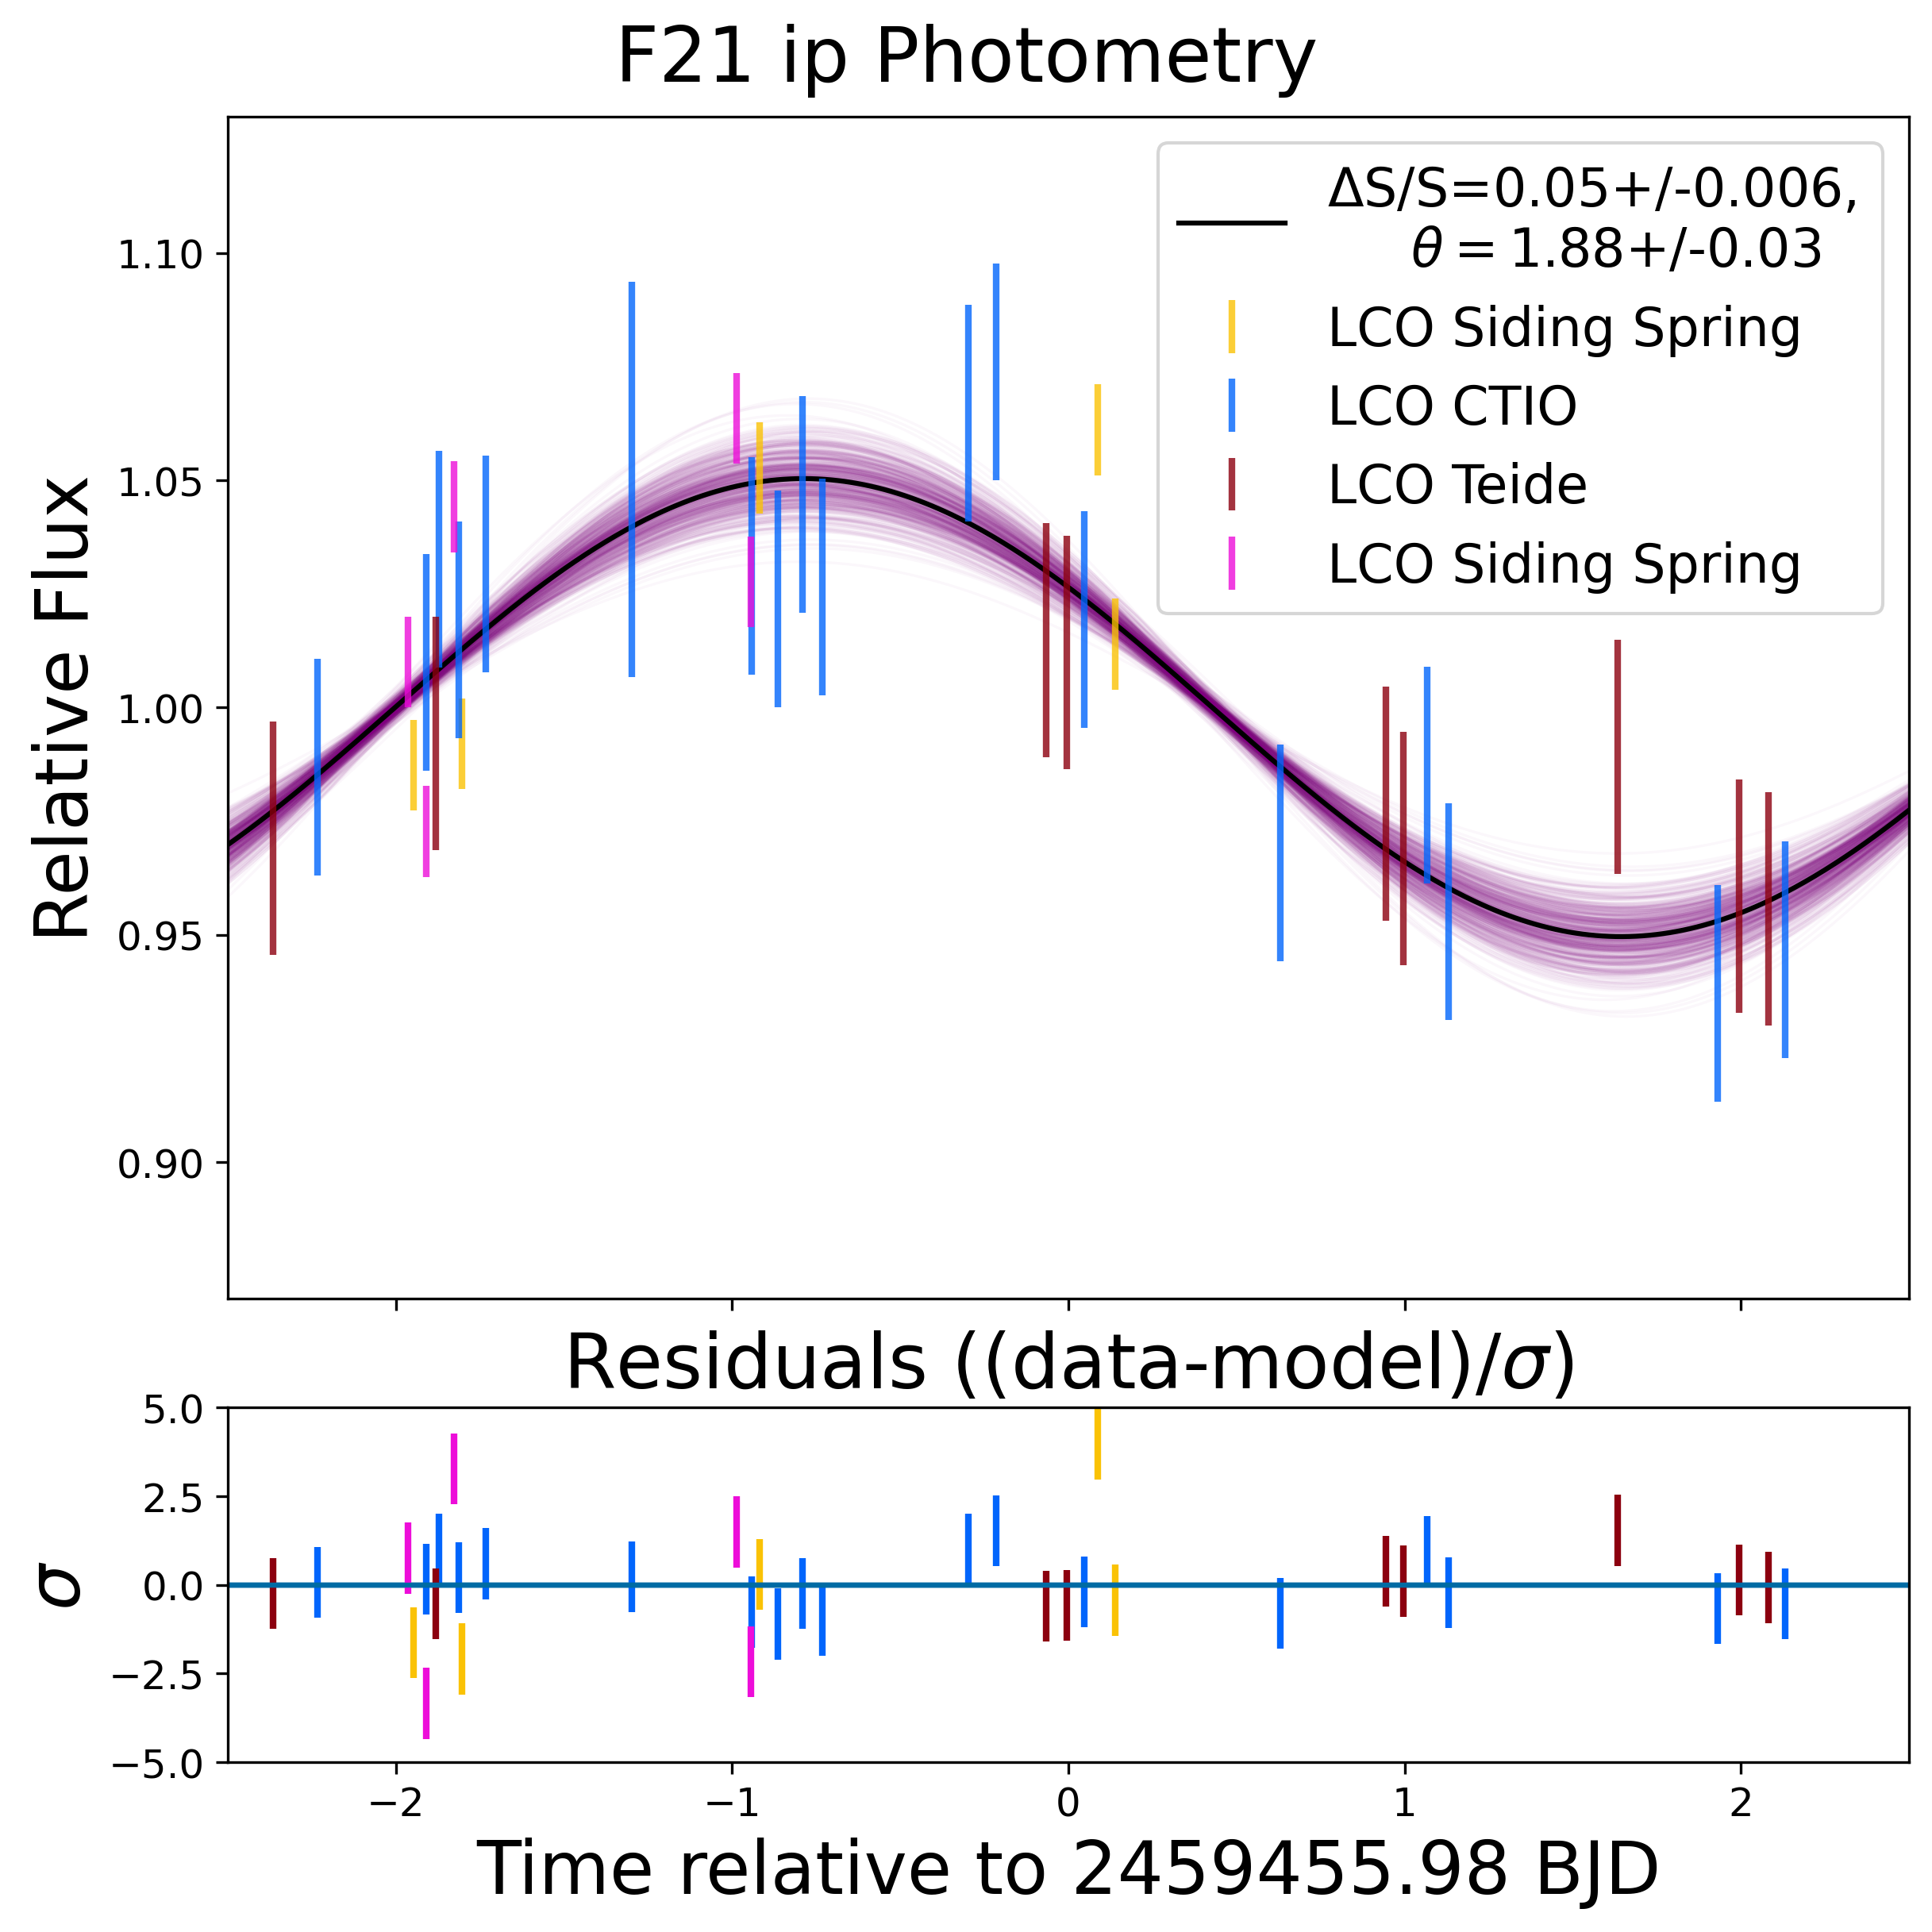

---------------------


  0%|          | 0/2 [00:00<?, ?it/s]

(Nsteps-burnin)*nwalkers/tau= [779.80178446]
(Nsteps-burnin)*nwalkers/tau= [1018.04857979]
(Nsteps-burnin)*nwalkers/tau= [993.24796467]
(Nsteps-burnin)*nwalkers/tau= [1032.40183854]
(Nsteps-burnin)*nwalkers/tau= [1029.1230977]
(Nsteps-burnin)*nwalkers/tau= [919.87682288]
(Nsteps-burnin)*nwalkers/tau= [996.43805998]
MCMC Results:
S22 gp
X = 0.07564 +0.00376 -0.00369
Theta = 2.028 +0.0455 -0.0439


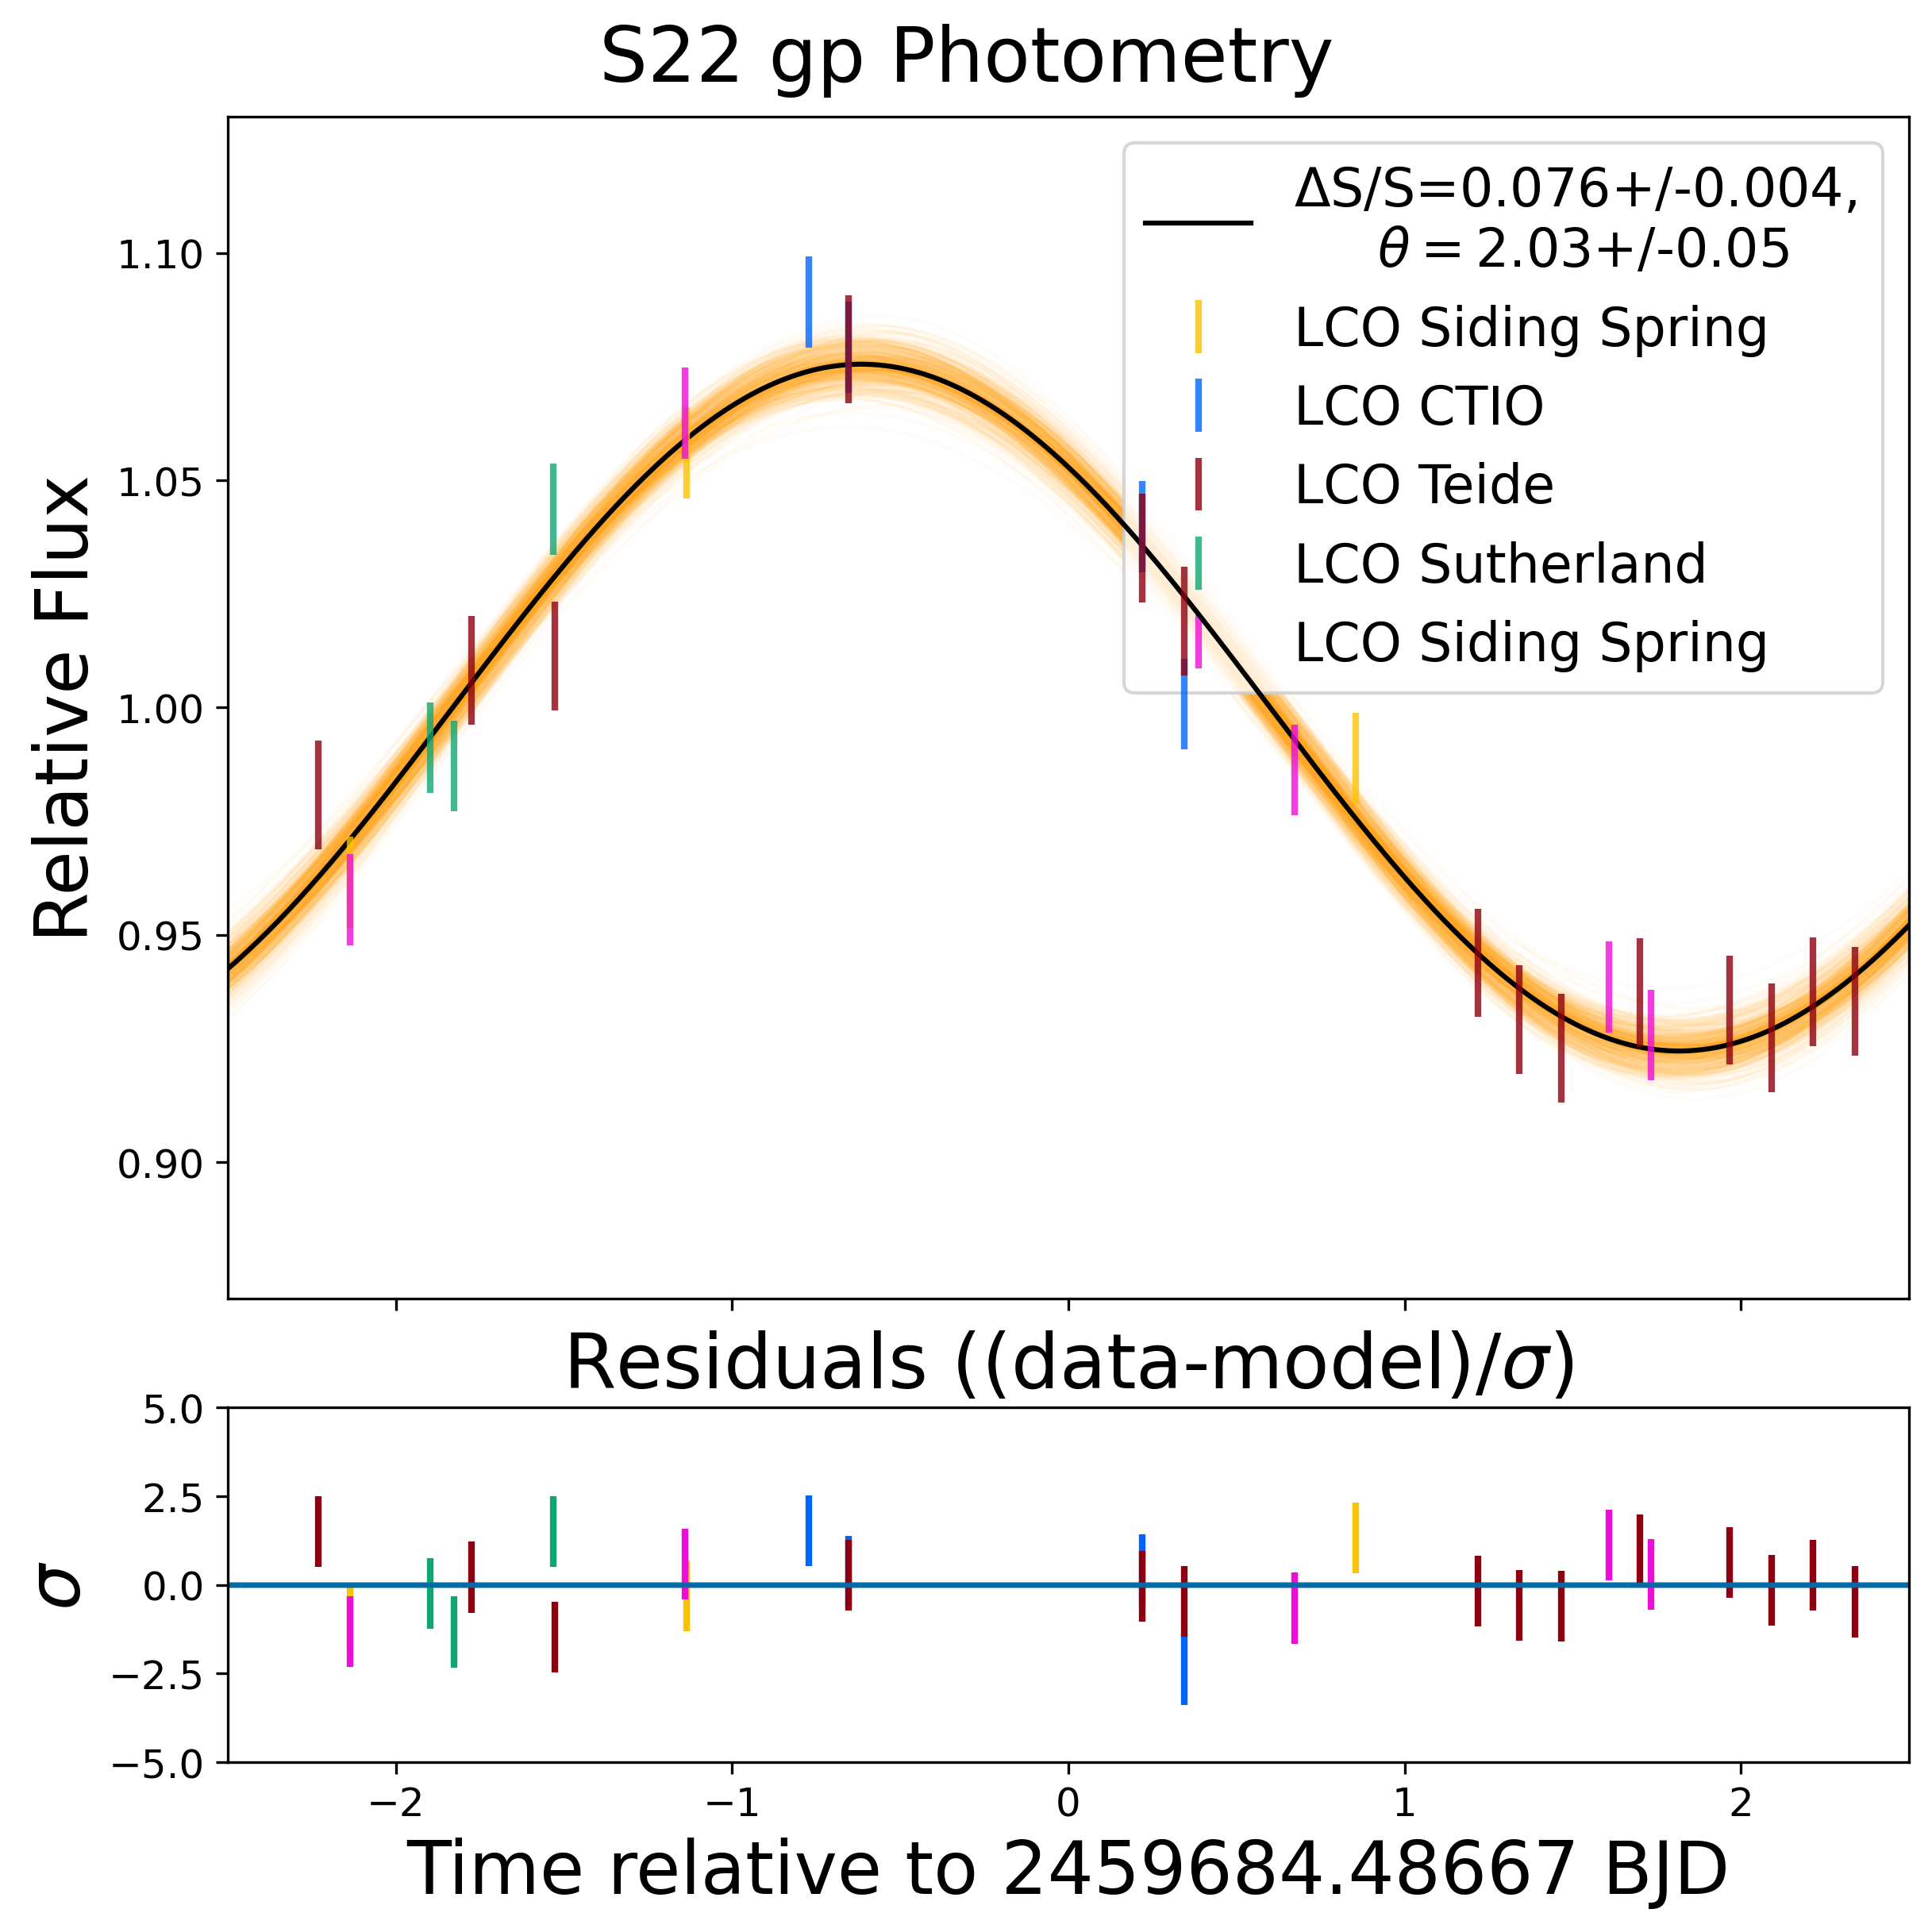

---------------------
(Nsteps-burnin)*nwalkers/tau= [1001.15683359]
(Nsteps-burnin)*nwalkers/tau= [974.39932514]
(Nsteps-burnin)*nwalkers/tau= [1105.1905726]
(Nsteps-burnin)*nwalkers/tau= [1102.38036073]
(Nsteps-burnin)*nwalkers/tau= [806.90326931]
(Nsteps-burnin)*nwalkers/tau= [1036.19784234]
(Nsteps-burnin)*nwalkers/tau= [1137.98258436]
MCMC Results:
S22 rp
X = 0.0758 +0.00403 -0.00414
Theta = 2.037 +0.0446 -0.0451


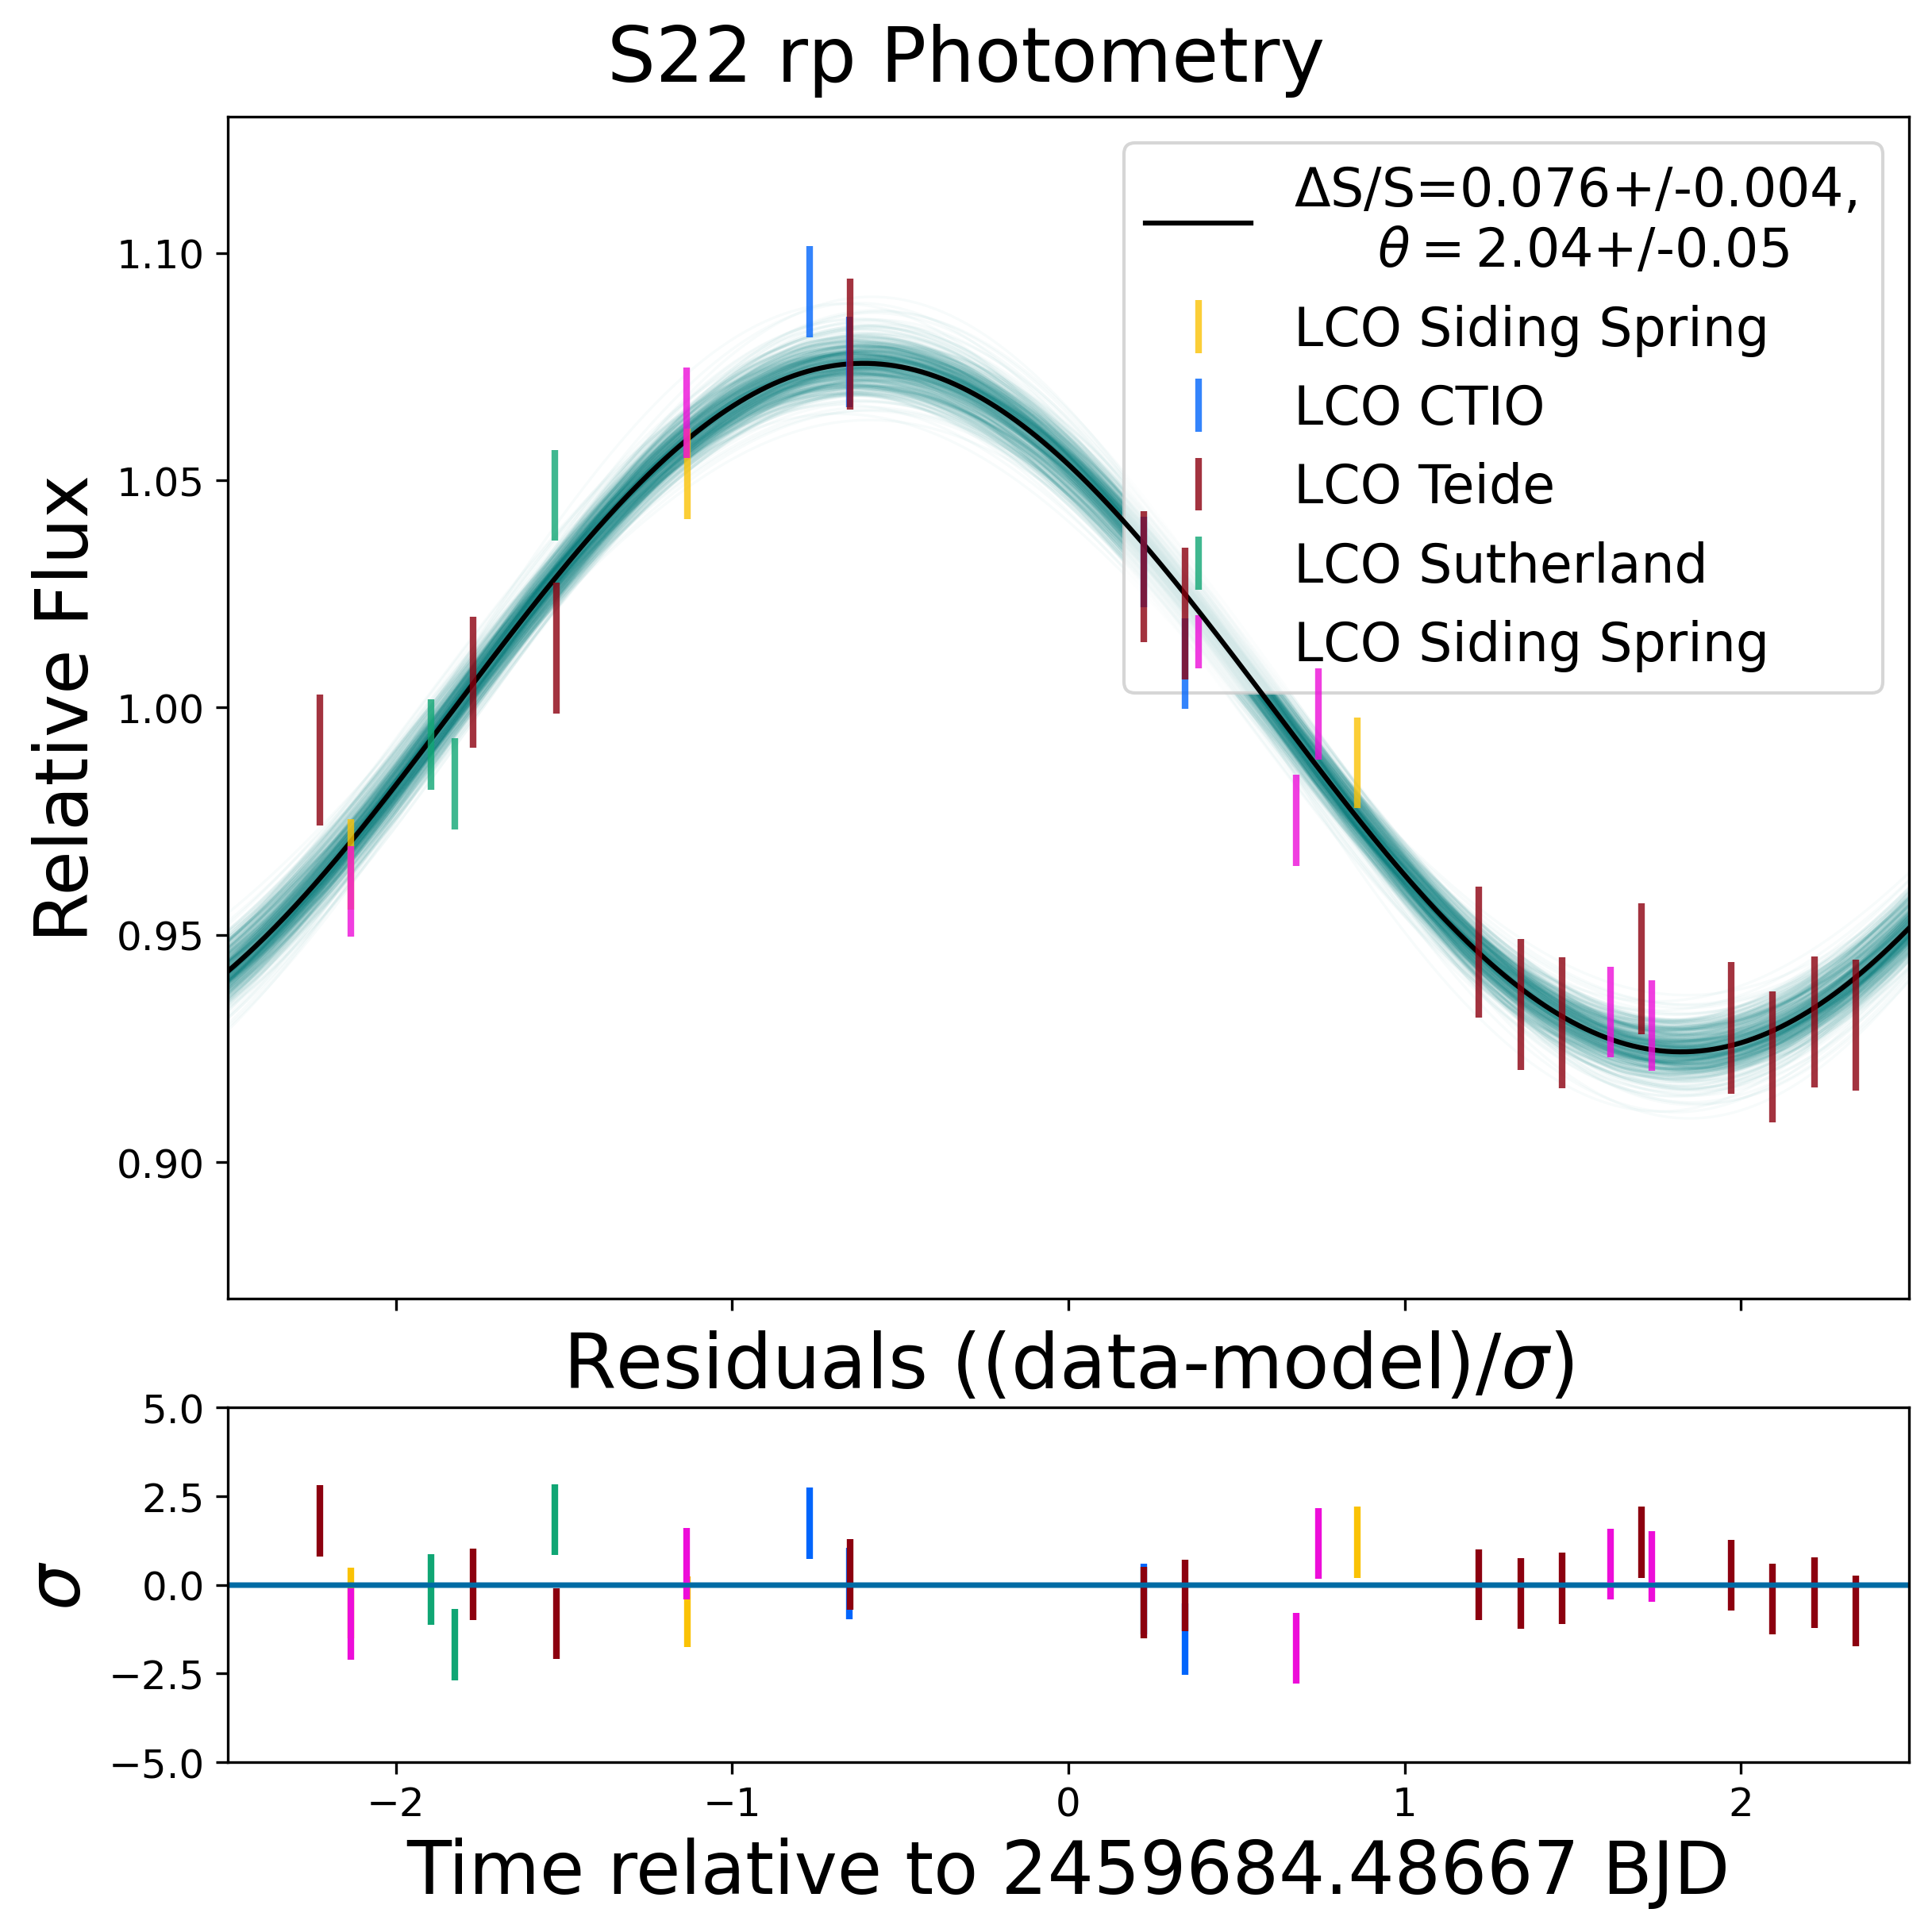

---------------------


In [22]:
visits = ['F21','S22']
# visits = ['F21']
nwalkers, nsteps = 100, 1000
burnin = int(0.25*nsteps)

for visit in tqdm(visits):
    
    # fig,axs = plt.subplots(3,2,figsize=10,3)
    
    if visit == 'F21':
        filt_names=['gp','rp','ip']
        labels = ['LCO Siding Spring', 'LCO CTIO', 'LCO Teide', 'LCO Siding Spring']
        cam_names = ['kb24', 'kb26', 'kb29', 'kb88']
        colors = ['#fac205','#0165fc','#8c000f','#ed0dd9']
        T0 = (59455.48 + 2400000.5)
        ndim = 6  
        ncams = 4
        
    if visit == 'S22':
        filt_names=['gp','rp']
        labels = ['LCO Siding Spring', 'LCO CTIO', 'LCO Teide', 'LCO Sutherland', 'LCO Siding Spring']
        colors = ['#fac205','#0165fc','#8c000f','#10a674','#ed0dd9']
        cam_names = ['kb24', 'kb26', 'kb29', 'kb87', 'kb88']
        T0 = (59455.48 + 2400000.5) + (27.*8.46321)
        ndim = 7  
        ncams = 5
        
    for this_filter in tqdm(filt_names):
        
        if this_filter =='gp':
            this_filt_color='orange'
        if this_filter=='rp':
            this_filt_color='teal'
        if this_filter=='ip':
            this_filt_color='purple'

        fitted_parameters = np.load(f'../data/rainbows/{visit}_{this_filter}_fittedparameters.npy')
        clipped_lcs = [None]*ncams 
        for m in range(0,ncams):
            clipped_lcs[m] = recreate_lc(visit=visit,filt=this_filter,camera=cam_names[m])

        hires_model_times = np.linspace(T0-2.5,T0+2.5,500)

        A_init = np.random.uniform(fitted_parameters[0]-0.001, fitted_parameters[0]+0.001, nwalkers)
        B_init = np.random.uniform(fitted_parameters[1]-0.001, fitted_parameters[1]+0.001, nwalkers)        
        C24_init = np.random.uniform(fitted_parameters[2]-0.001, fitted_parameters[2]+0.001, nwalkers)
        C26_init = np.random.uniform(fitted_parameters[3]-0.001, fitted_parameters[3]+0.001, nwalkers)
        C29_init = np.random.uniform(fitted_parameters[4]-0.001, fitted_parameters[4]+0.001, nwalkers)
        if visit =='F21':
            C88_init = np.random.uniform(fitted_parameters[5]-0.001, fitted_parameters[5]+0.001, nwalkers)
            p0 = np.transpose([A_init, B_init, C24_init, C26_init, C29_init, C88_init])
        if visit =='S22':
            C87_init = np.random.uniform(fitted_parameters[5]-0.001, fitted_parameters[5]+0.001, nwalkers)
            C88_init = np.random.uniform(fitted_parameters[6]-0.001, fitted_parameters[6]+0.001, nwalkers)
            p0 = np.transpose([A_init, B_init, C24_init, C26_init, C29_init, C87_init, C88_init])

        # set up file saving for the samples when finished
        filename = f"../data/{visit}_{this_filter}_samples.h5"
        backend = emcee.backends.HDFBackend(filename)
        backend.reset(nwalkers, ndim)

        # Initialize and run the sampler
        sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_formcmc, backend=backend)
        result = sampler.run_mcmc(p0, nsteps)
        samples = sampler.chain[:, burnin:, :].reshape((-1, ndim)).T
        
        for i in range(len(samples)):
            tau_f = emcee.autocorr.integrated_time(samples[i])
            print('(Nsteps-burnin)*nwalkers/tau=',(nsteps-burnin)*nwalkers/tau_f)

        # Extract and label samples
        sig1_A = np.percentile(samples[0], [15.9, 50., 84.1])
        sig1_B = np.percentile(samples[1], [15.9, 50., 84.1])
        sig1_C24 = np.percentile(samples[2], [15.9, 50., 84.1])
        sig1_C26 = np.percentile(samples[3], [15.9, 50., 84.1])
        sig1_C29 = np.percentile(samples[4], [15.9, 50., 84.1])
        if visit == 'F21':
            sig1_C88 = np.percentile(samples[5], [15.9, 50., 84.1])
            best_params = [sig1_A[1], sig1_B[1], sig1_C24[1], sig1_C26[1], sig1_C29[1], sig1_C88[1]]
        if visit == 'S22':
            sig1_C87 = np.percentile(samples[5], [15.9, 50., 84.1])
            sig1_C88 = np.percentile(samples[6], [15.9, 50., 84.1])
            best_params = [sig1_A[1], sig1_B[1], sig1_C24[1], sig1_C26[1], sig1_C29[1], sig1_C87[1], sig1_C88[1]]        

        X_sam = np.sqrt(samples[0]**2 + samples[1]**2)
        theta_sam = np.arccos(samples[0]/X_sam)
        X = np.percentile(X_sam, [15.9, 50., 84.1])
        Theta = np.percentile(theta_sam, [15.9, 50., 84.1])

        print('MCMC Results:')
        print(f'{visit} {this_filter}')
        print(f'X = {X[1]:.4} +{(X[2]-X[1]):.3} -{(X[1]-X[0]):.3}')
        print(f'Theta = {Theta[1]:.4} +{(Theta[2]-Theta[1]):.3} -{(Theta[1]-Theta[0]):.3}')
        dX = np.max([(X[2]-X[1]),(X[1]-X[0])])
        dTheta = np.max([(Theta[2]-Theta[1]),(Theta[1]-Theta[0])])

        # Plot a high-resolution model from the best fit
        best_model = sinusoid_model(hires_model_times, best_params)
        fig,axs = plt.subplots(2,1,figsize=(8,8),sharex=True,gridspec_kw=dict(height_ratios=[1,0.3]))
        fig.suptitle(f'{visit} {this_filter} Photometry',fontsize=23)
        axs[0].plot(hires_model_times-T0, best_model, c='k',zorder=10,
                    label = r'$\Delta$S/S='+f'{X[1]:.2}+/-{dX:.1}, '+'\n'+r'     $\theta=$'+f'{Theta[1]:.3}+/-{dTheta:.1}')
        axs[0].set_ylabel('Relative Flux',fontsize=22)
        axs[0].set_ylim(0.87,1.13)
        axs[1].set_title(r'Residuals ((data-model)/$\sigma$)',fontsize=23)
        axs[1].set_xlabel(f'Time relative to {T0} BJD',fontsize=22)
        axs[1].set_ylabel(r'$\sigma$',fontsize=22)
        # axs[1].set_xlim(T0-2.5,T0+2.5)
        axs[1].set_xlim(-2.5,2.5)
        axs[1].set_ylim(-5,5)
        # Plot our 4 different data sets in this filter
        for i in range(0,ncams):
            this_lc = clipped_lcs[i]
            this_lc.flux = clipped_lcs[i].flux - best_params[i+2]
            data_model = sinusoid_model(this_lc.time.value,best_params)
            # Plot the data
            axs[0].errorbar(this_lc.time.value-T0,this_lc.flux,yerr=this_lc.flux_err,
                         label=labels[i],color=colors[i],alpha=0.8,zorder=100,linewidth=0,elinewidth=2)
            # Plot the residuals
            axs[1].errorbar(this_lc.time.value-T0,(this_lc.flux-data_model)/this_lc.flux_err,
                            yerr = 1,color= colors[i],alpha=1,linewidth=0,elinewidth=2)
            axs[1].axhline(0)
        axs[0].legend(loc='upper right',fontsize=16)    
        # Now we want to plot some random samples
        for j in range(0,500):
            l = np.random.randint(low=0,high=(nsteps-burnin)*100)
            random_params = [samples[0][l], samples[1][l]]
            sigma_model = sinusoid_model(hires_model_times,random_params)
            axs[0].plot(hires_model_times-T0,sigma_model,color=this_filt_color,alpha = 0.03,
                     linewidth=0.8,zorder=-1000)
        # plt.legend(loc='upper right')
        plt.savefig(f'../figs/{visit}_{this_filter}_RotationAmplitude_MCMC.png',dpi=100)
        plt.show()
        print('---------------------')